In [7]:
from sklearn.preprocessing import StandardScaler
def normalize(data, boundary):
    scaler = StandardScaler()
    scaler.fit(data[:boundary])
    ndata = scaler.transform(data)
    return ndata

In [58]:
#Building the time series dataset 
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

def modelfn(df, use_sentiment=False):
    input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
    if(use_sentiment==True):
        print('Using sentiment..')
        input_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score']].values 
    targets = df['Return'].values
    T = 10                            #Time window for getting sequences for the autoregressive RNN model
    D = input_data.shape[1]
    N = len(input_data) - T
    ntrain = len(input_data) * 4 // 5  #80% data is for training, 20% is for validating
    input_data = normalize(input_data, ntrain+T)

    #Train set
    import numpy as np
    X_train = np.zeros((ntrain, T, D))
    Y_train = np.zeros(ntrain)
    for t in range(ntrain):
        X_train[t, :, :] = input_data[t:t+T]
        Y_train[t] = (targets[t+T] > 0)

    #Test set
    X_test = np.zeros((N-ntrain, T, D))
    Y_test = np.zeros(N-ntrain)
    for v in range(N-ntrain):
        t = v + ntrain
        X_test[v, :, :] = input_data[t:t+T]
        Y_test[v] = (targets[t+T] > 0)

    i = keras.layers.Input((T, D))
    h = keras.layers.LSTM(50)(i)
    o = keras.layers.Dense(1, activation='sigmoid')(h)
    fmodel = keras.models.Model(i,o)
    fmodel.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

    res = fmodel.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data=(X_test, Y_test))

    plt.plot(res.history['loss'], label='Train error')
    plt.plot(res.history['val_loss'], label='Test error')
    plt.legend()
    plt.show()
    plt.plot(res.history['accuracy'], label='Train accuracy')
    plt.plot(res.history['val_accuracy'], label='Test accuracy')
    plt.legend()
    plt.show()
    return (fmodel, X_train, X_test, Y_test)


In [59]:
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df =  pd.read_csv('data/TSLA_with_sentiment.csv')
df['PrevClose'] = df['Close'].shift(1)
df['Return'] = (df['Close'] - df['PrevClose'])/df['PrevClose']
df_ns = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
df_s = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score', 'Return']]

Epoch 1/300
7/7 [==============================] - 1s 73ms/step - loss: 0.6972 - accuracy: 0.5075 - val_loss: 0.6817 - val_accuracy: 0.5610
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6820 - accuracy: 0.5721 - val_loss: 0.6842 - val_accuracy: 0.5610
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6793 - accuracy: 0.5622 - val_loss: 0.6972 - val_accuracy: 0.5610
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6795 - accuracy: 0.5672 - val_loss: 0.7055 - val_accuracy: 0.5610
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.5721 - val_loss: 0.6982 - val_accuracy: 0.5610
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.5721 - val_loss: 0.6984 - val_accuracy: 0.5610
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.5572 - val_loss: 0.7000 - val_accuracy: 0.5610
Epoch 8/300
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.6431 - accuracy: 0.6219 - val_loss: 0.7050 - val_accuracy: 0.5122
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.5970 - val_loss: 0.7028 - val_accuracy: 0.5122
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6481 - accuracy: 0.6119 - val_loss: 0.7043 - val_accuracy: 0.5122
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.6070 - val_loss: 0.7041 - val_accuracy: 0.5610
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.6020 - val_loss: 0.7049 - val_accuracy: 0.5610
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6421 - accuracy: 0.6219 - val_loss: 0.7055 - val_accuracy: 0.5610
Epoch 65/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.5970 - val_loss: 0.7074 - val_accuracy: 0.4878
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6269 - val_loss: 0.7622 - val_accuracy: 0.4390
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6078 - accuracy: 0.6517 - val_loss: 0.7633 - val_accuracy: 0.4390
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.6517 - val_loss: 0.7665 - val_accuracy: 0.4390
Epoch 120/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6001 - accuracy: 0.6567 - val_loss: 0.7673 - val_accuracy: 0.4390
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5980 - accuracy: 0.6567 - val_loss: 0.7630 - val_accuracy: 0.4390
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.6517 - val_loss: 0.7653 - val_accuracy: 0.4390
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.6418 - val_loss: 0.7704 - val_accuracy: 0.4390
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.6866 - val_loss: 0.8800 - val_accuracy: 0.4146
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5277 - accuracy: 0.7015 - val_loss: 0.8925 - val_accuracy: 0.4146
Epoch 177/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5301 - accuracy: 0.7164 - val_loss: 0.9036 - val_accuracy: 0.4146
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7114 - val_loss: 0.8992 - val_accuracy: 0.4146
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.6866 - val_loss: 0.8876 - val_accuracy: 0.4146
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5519 - accuracy: 0.6965 - val_loss: 0.9057 - val_accuracy: 0.4146
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5528 - accuracy: 0.7065 - val_loss: 0.9246 - val_accuracy: 0.4146
Epoch 182/300
7/7 [========

Epoch 233/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4457 - accuracy: 0.7512 - val_loss: 1.0537 - val_accuracy: 0.5610
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.7363 - val_loss: 1.0505 - val_accuracy: 0.5610
Epoch 235/300
7/7 [==============================] - 0s 5ms/step - loss: 0.4428 - accuracy: 0.7711 - val_loss: 1.0919 - val_accuracy: 0.5610
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4363 - accuracy: 0.7612 - val_loss: 1.0515 - val_accuracy: 0.5610
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4421 - accuracy: 0.7612 - val_loss: 1.0585 - val_accuracy: 0.5854
Epoch 238/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4403 - accuracy: 0.7711 - val_loss: 1.0762 - val_accuracy: 0.5610
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.7662 - val_loss: 1.0704 - val_accuracy: 0.5366
Epoch 240/300

7/7 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8308 - val_loss: 1.3580 - val_accuracy: 0.5366
Epoch 292/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3567 - accuracy: 0.8408 - val_loss: 1.3797 - val_accuracy: 0.5366
Epoch 293/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3594 - accuracy: 0.8109 - val_loss: 1.3060 - val_accuracy: 0.5366
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.8259 - val_loss: 1.3365 - val_accuracy: 0.5366
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3461 - accuracy: 0.8358 - val_loss: 1.3494 - val_accuracy: 0.5366
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3459 - accuracy: 0.8607 - val_loss: 1.4283 - val_accuracy: 0.5122
Epoch 297/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3556 - accuracy: 0.8308 - val_loss: 1.3470 - val_accuracy: 0.5366
Epoch 298/300
7/7 [========

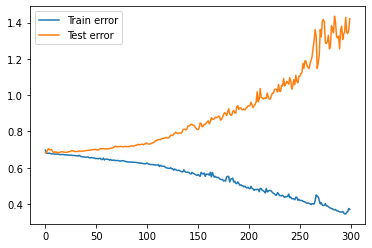

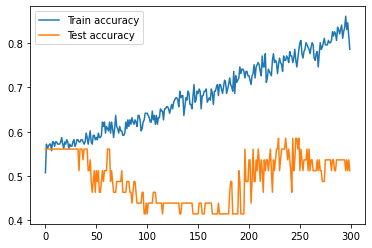

In [64]:
#Without sentiment
fmodelns, X_train_ns, X_test_ns, Y_test_ns = modelfn(df, use_sentiment=False)

Using sentiment..
Epoch 1/300
7/7 [==============================] - 0s 70ms/step - loss: 0.6884 - accuracy: 0.5522 - val_loss: 0.6907 - val_accuracy: 0.5610
Epoch 2/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.5522 - val_loss: 0.6900 - val_accuracy: 0.5610
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6785 - accuracy: 0.5672 - val_loss: 0.6905 - val_accuracy: 0.5610
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6769 - accuracy: 0.5771 - val_loss: 0.6885 - val_accuracy: 0.5610
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.5672 - val_loss: 0.6887 - val_accuracy: 0.5610
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6758 - accuracy: 0.5821 - val_loss: 0.6947 - val_accuracy: 0.5610
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.5771 - val_loss: 0.7027 - val_accuracy: 0.5610
Epoch 8/

7/7 [==============================] - 0s 6ms/step - loss: 0.6159 - accuracy: 0.6517 - val_loss: 0.7456 - val_accuracy: 0.5610
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.6567 - val_loss: 0.7323 - val_accuracy: 0.5122
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6154 - accuracy: 0.6617 - val_loss: 0.7282 - val_accuracy: 0.4878
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6097 - accuracy: 0.6716 - val_loss: 0.7334 - val_accuracy: 0.5366
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6092 - accuracy: 0.6716 - val_loss: 0.7390 - val_accuracy: 0.5610
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.6667 - val_loss: 0.7450 - val_accuracy: 0.5854
Epoch 65/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6138 - accuracy: 0.6716 - val_loss: 0.7488 - val_accuracy: 0.4878
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.4708 - accuracy: 0.7512 - val_loss: 0.9473 - val_accuracy: 0.5610
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.7463 - val_loss: 0.9533 - val_accuracy: 0.5610
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4906 - accuracy: 0.7264 - val_loss: 0.8761 - val_accuracy: 0.5854
Epoch 120/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4744 - accuracy: 0.7512 - val_loss: 0.8699 - val_accuracy: 0.5854
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.7761 - val_loss: 0.8857 - val_accuracy: 0.5854
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4523 - accuracy: 0.7662 - val_loss: 0.9167 - val_accuracy: 0.5854
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.7413 - val_loss: 0.9658 - val_accuracy: 0.5854
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3675 - accuracy: 0.8159 - val_loss: 1.2186 - val_accuracy: 0.5854
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8308 - val_loss: 1.1899 - val_accuracy: 0.5854
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3461 - accuracy: 0.8408 - val_loss: 1.2217 - val_accuracy: 0.5854
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3454 - accuracy: 0.8308 - val_loss: 1.2361 - val_accuracy: 0.5854
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.8259 - val_loss: 1.2633 - val_accuracy: 0.5854
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 0.8458 - val_loss: 1.2516 - val_accuracy: 0.5854
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3442 - accuracy: 0.8458 - val_loss: 1.2469 - val_accuracy: 0.5854
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.2781 - accuracy: 0.8706 - val_loss: 1.4445 - val_accuracy: 0.5854
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2934 - accuracy: 0.8607 - val_loss: 1.4292 - val_accuracy: 0.5854
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.8806 - val_loss: 1.4687 - val_accuracy: 0.5854
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2670 - accuracy: 0.8806 - val_loss: 1.5109 - val_accuracy: 0.5854
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.8856 - val_loss: 1.4820 - val_accuracy: 0.5854
Epoch 238/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.8756 - val_loss: 1.4708 - val_accuracy: 0.5854
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.8358 - val_loss: 1.4316 - val_accuracy: 0.5854
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9204 - val_loss: 1.7819 - val_accuracy: 0.5854
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2000 - accuracy: 0.9204 - val_loss: 1.7471 - val_accuracy: 0.5854
Epoch 293/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1922 - accuracy: 0.9254 - val_loss: 1.7347 - val_accuracy: 0.5854
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.9254 - val_loss: 1.7970 - val_accuracy: 0.5854
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1827 - accuracy: 0.9254 - val_loss: 1.8282 - val_accuracy: 0.5854
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1749 - accuracy: 0.9353 - val_loss: 1.7913 - val_accuracy: 0.5854
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1731 - accuracy: 0.9254 - val_loss: 1.8073 - val_accuracy: 0.5854
Epoch 298/300
7/7 [========

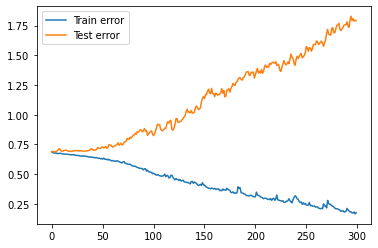

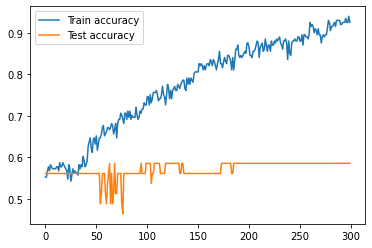

In [65]:
#With sentiment
fmodels, X_train_s, X_test_s, Y_test_s = modelfn(df, use_sentiment=True)

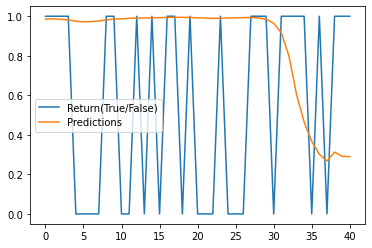

Precision:  0.40756302521008403
Recall:  0.4468599033816425
F1 score:  0.3957894736842105
Accuracy:  0.4878048780487805


In [62]:
#Without Sentiment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import numpy as np
outputs_ns = fmodelns.predict(X_test_ns)
predictions_ns = outputs_ns[:, 0]
plt.plot(Y_test_ns, label='Return(True/False)')
plt.plot(predictions_ns, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_ns > 0.5
print('Precision: ', precision_score(Y_test_ns, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_ns, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_ns, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_ns, y_pred))

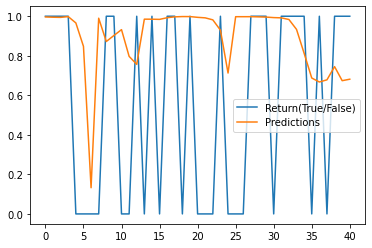

Precision:  0.7875
Recall:  0.5277777777777778
F1 score:  0.4177109440267335
Accuracy:  0.5853658536585366


In [63]:
#With Sentiment
outputs_s = fmodels.predict(X_test_s)
predictions_s = outputs_s[:, 0]
plt.plot(Y_test_s, label='Return(True/False)')
plt.plot(predictions_s, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_s > 0.5
print('Precision: ', precision_score(Y_test_s, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_s, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_s, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_s, y_pred))